In [1]:
from chromstream.parsers import parse_chromatogram_txt
from chromstream.objects import Chromatogram
from chromstream.objects import Experiment
import os
from pathlib import Path

import re
import pandas as pd
import logging as log


# MTO setup

# Logfile parsers

In [2]:
exp2 = Experiment(name="Bas")
data_home = Path("..") / "dev_data" / "chroms" /  "small_GC_ballmill" / "Ina"
paths_all = sorted((data_home).iterdir())
# adding chromatograms

from chromstream.data_processing import min_subtract, time_window_baseline, split_chromatogram

for p in paths_all:
    chrom = parse_chromatogram_txt(p)
    chrom.apply_baseline(min_subtract, inplace=False)
    exp2.add_chromatogram(chrom)
# adding log files

Attempts at a splitting function

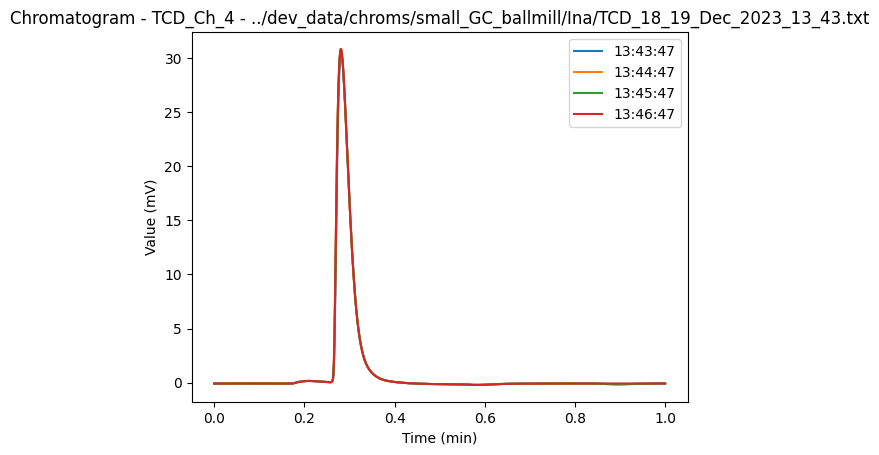

In [8]:
chromatogram = exp2.channels['TCD_Ch_4'].chromatograms[0]
# chromatogram = exp2.channels['FID_Ch1'].chromatograms[51]
split_chromatograms = split_chromatogram(chromatogram, 4,start_offset=300, end_offset=0, reset_time=True)


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for chrom in split_chromatograms:
    # print(chrom.data['Value (pA)'].idxmax())
    # print(len(chrom.data))
    chrom.plot(ax=ax, label=chrom.injection_time.strftime("%H:%M:%S"))
ax.legend()
# ax.axvline(1.16)

In [5]:
data_home_logs = Path("..") / "dev_data" /"logs"/ "Nicolette" 
paths_logs = sorted((data_home_logs).iterdir())

exp3 = Experiment(name="Nicolette")
data_home = Path("..") / "dev_data" / "chroms" /  "Nicolette" 
paths_all = sorted((data_home).iterdir())
# adding chromatograms


for p in paths_all:
    chrom = parse_chromatogram_txt(p)
    chrom.apply_baseline(min_subtract, inplace=False)
    exp3.add_chromatogram(chrom)

7000
7000
7000
7000
7000
7000


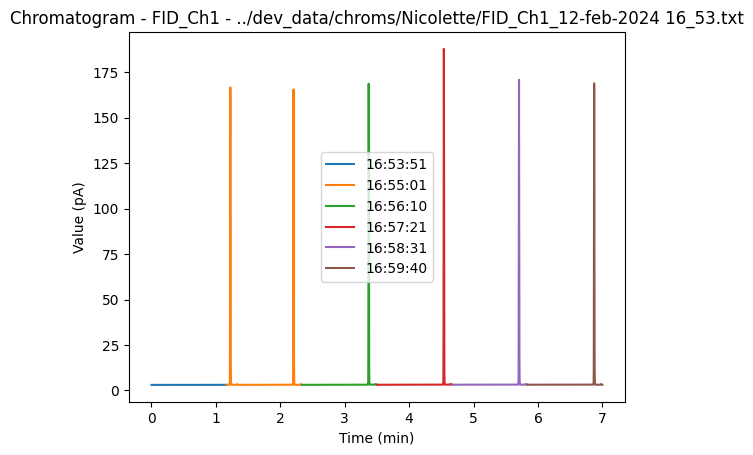

In [6]:
# chromatogram = exp2.channels['TCD_Ch2_3'].chromatograms[51]
chromatogram = exp3.channels['FID_Ch1'].chromatograms[51]
split_chromatograms = split_chromatogram(chromatogram, 6,start_offset=0, end_offset=0, reset_time=False)
fig, ax = plt.subplots()
for chrom in split_chromatograms:
    chrom.plot(ax=ax, label=chrom.injection_time.strftime("%H:%M:%S"))
    print(len(chrom.data))
ax.legend()